<a href="https://colab.research.google.com/github/abhinag007/Stock-Money-MLM/blob/master/ARIMA_STOCK_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas_datareader.data as web

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Get the stock quote
df = web.DataReader('TATAMOTORS.NS', data_source='yahoo',start = '2019-01-25', end = '2020-8-15')

In [ ]:
df['Date'] = df.index
df

,High,Low,Open,Close,Volume,Adj Close,Date
Date,,,,,,,
2019-01-25,178.899994,171.949997,175.949997,173.250000,12136892.0,173.250000,2019-01-25
2019-01-28,175.350006,169.399994,173.300003,172.300003,8167430.0,172.300003,2019-01-28
2019-01-29,174.899994,170.899994,172.350006,173.600006,6141180.0,173.600006,2019-01-29
2019-01-30,176.750000,173.300003,174.300003,174.600006,7757847.0,174.600006,2019-01-30
2019-01-31,183.899994,175.800003,175.800003,181.199997,22277646.0,181.199997,2019-01-31
...,...,...,...,...,...,...,...
2020-08-10,124.699997,119.699997,119.949997,123.849998,71093810.0,123.849998,2020-08-10
2020-08-11,125.800003,121.400002,125.000000,122.300003,50224665.0,122.300003,2020-08-11
2020-08-12,126.400002,120.599998,121.000000,125.349998,50713617.0,125.349998,2020-08-12


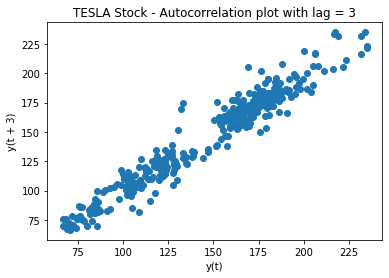

In [ ]:
plt.figure()
lag_plot(df['Open'], lag=3)
plt.title('TESLA Stock - Autocorrelation plot with lag = 3')
plt.show()

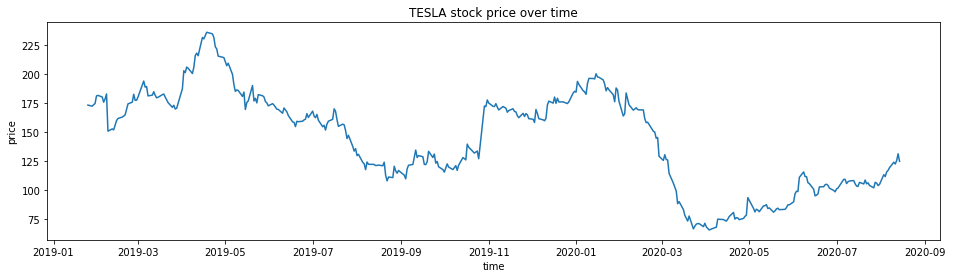

In [ ]:
plt.figure(figsize=(16,4))
plt.plot(df["Date"], df["Close"])
# plt.xticks(np.arange(0,1259, 200), df['Date'][0:1259:200])
plt.title("TESLA stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [ ]:
train_data, test_data = df[0:int(len(df)*0.9)], df[int(len(df)*0.9):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 9.819625168211317


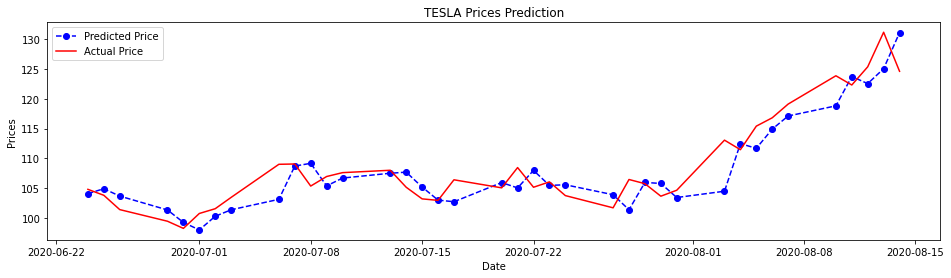

In [ ]:
test_set_range = df[int(len(df)*0.9):].index
plt.figure(figsize=(16,4))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('TESLA Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
# plt.xticks(np.arange(881,1259,50), df.Date[881:1259:50])
plt.legend()
plt.show()

In [ ]:
model_predictions = np.array(model_predictions)

In [ ]:
model_predictions

array([[104.08982906],
       [104.90022516],
       [103.66803409],
       [101.3404992 ],
       [ 99.25284437],
       [ 97.9930343 ],
       [100.27983721],
       [101.37173966],
       [103.12119754],
       [108.69941128],
       [109.16421305],
       [105.37465844],
       [106.69282203],
       [107.49823927],
       [107.68317048],
       [105.19025057],
       [102.99407772],
       [102.71924285],
       [105.9367614 ],
       [105.03583124],
       [107.97722167],
       [105.45651397],
       [105.56751112],
       [103.89886271],
       [101.37836485],
       [105.96007525],
       [105.78562138],
       [103.42636639],
       [104.48202024],
       [112.4660866 ],
       [111.67788966],
       [114.90158312],
       [117.10082578],
       [118.80422873],
       [123.72262311],
       [122.53075252],
       [125.03622302],
       [131.08074869]])

In [ ]:
test_data

array([104.80000305, 103.80000305, 101.40000153,  99.44999695,
        98.25      , 100.75      , 101.55000305, 103.44999695,
       109.        , 109.05000305, 105.34999847, 106.94999695,
       107.59999847, 108.        , 105.15000153, 103.19999695,
       102.94999695, 106.40000153, 105.05000305, 108.44999695,
       105.15000153, 106.05000305, 103.75      , 101.69999695,
       106.44999695, 105.75      , 103.65000153, 104.65000153,
       113.05000305, 111.44999695, 115.40000153, 116.80000305,
       119.09999847, 123.84999847, 122.30000305, 125.34999847,
       131.1499939 , 124.59999847])